## Task 1:


## Prediction using Supervised Machine Learning


### Author: Anyanwu Justice


### GRIP: The Sparks Foundation


### Role: Data Science and Business Analytics intern


### Duration: April 2023 - May 2023







## **Linear Regression with Python Scikit Learn**


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


## Simple Linear Regression


In this regression task, we will predict the percentage of marks that a student is expected to score based on the numbers of hours they studied. Also find out what will be the predicted score if a student studies for 9.25 hours. 


### Importing all necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set()

In [2]:
student_df= pd.read_csv(r'C:\Users\Ceejay\Downloads\scores.csv')
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The dataset has 25 values with two columns. The hours column is of the float data type and the scores column is of the integer data type.


In [4]:
# Checking for missing values
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Checking for duplicated values
student_df.duplicated().sum()

0

There are no missing or duplicated values in the dataset.

In [6]:
# Getting summary statistics of the dataset
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The mean study hours of students in this dataset is 5.012 hours and the mean score is 51.48. The maximum study hours and maximum score is 9.2 hrs and 95 respectively. 

### Visualizing the dataset to see if there is any relationship between the two columns.

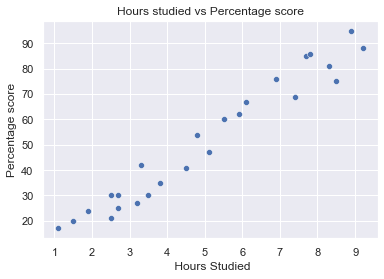

In [7]:
sns.scatterplot(x = "Hours", y = "Scores", data= student_df )
plt.ylabel("Percentage score")
plt.xlabel(" Hours Studied")
plt.title("Hours studied vs Percentage score")
plt.show()

The figure above shows the relationship between hours studied and percentage score. There is a positive linear relationship between the two variables.

### Data Preparation

The data will now be separated into two sets; the training and the test set. The training set will be used to train the model and the test set will be used to validate it.

In [8]:
# We divide our data into attributes (x) and labels (y) first
x= student_df.iloc[:, :-1].values
y= student_df.iloc[:, 1].values

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 207)

The data has been splitted into training and test set in the ratio of 80:20

### Data Modelling

In [10]:
# Instantiating our model and fit it to the training set
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("Training completed")

Training completed


The model has been trained successfully, now we plot the regression line of the model based on the principle that y= a*x + b, where a is the slope of the regression line and b is the intercept...

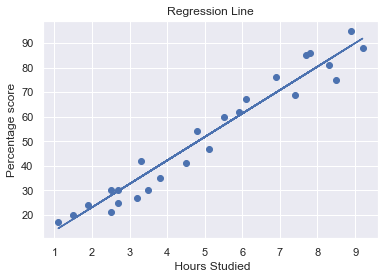

In [11]:
line = lin_reg.coef_ * x + lin_reg.intercept_ 
plt.scatter(x, y)
plt.plot(x, line)
plt.ylabel("Percentage score")
plt.xlabel(" Hours Studied")
plt.title("Regression Line")
plt.show()

The regression line is close to all the values plotted. That means the error is minimized and therefore our model is a good model.

Now, we validate our model by predicting on the test set....

In [12]:
y_pred= lin_reg.predict(x_test)
# Comparing the actual values to the predicted values
df= pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,41,46.947241
1,76,69.878091
2,30,37.392720
3,35,40.259076
4,60,56.501762


## Model Evaluation

Now we use a metric to measure the performance of our model. The metric of choice is the RMSE(Root mean squared error). It measures the average difference between values predicted by a model and the actual values. The lower the RMSE, the better the model...

In [13]:
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print("RMSE of our model is {}".format(rmse))

RMSE of our model is 5.786109511577069


Now we use our model to predict the score of a student who studies for 9.25 hours....

In [19]:
hours= [[9.25]]
score= lin_reg.predict(hours)
print("The score of a student who studies for {} hours is {}%".format(hours[0][0], score[0].round(2)))


The score of a student who studies for 9.25 hours is 92.33%


# THANK YOU